# Matrix operations

In this section we are going to review some basic matrix operations in Python. <br>

This tutorial can be deployed in <a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Coding/matrix_operations.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In the previous tutorial, <a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Coding/intro_linear_algebra.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>, we review some of the most common operations on vectors, including the **dot product**.
$$
\mathbf{u}^\top \mathbf{v} = \sum_i^n u_i v_j
$$

Similarly, we can define the matrix-vector multiplication using the same function we coded previously for the dot product.


In [8]:
def dot_product(u,v):
    nu = u.shape[0]
    nv = v.shape[0]
    
    if nu == nv: # check they are the same size
        value = 0
        for i in range(nu):
            value += u[i] * v[i]
        return value
    else:
        raise TypeError("Vectors have different size")

In [22]:
# let's test our function
v = np.random.randint(low=-10, high=10, size=5)
u = np.random.randint(low=-10, high=10, size=5)

print('dot product(ours): ', dot_product(u, v))
print('dot product(Numpy): ', v.T @ u)

dot product(ours):  -38
dot product(Numpy):  -38


As we saw in class, matrix-vector multiplication can be define in terms of the dot product between the vector and the rows of the matrix.
$$
\mathbf{A} \mathbf{v} =  \begin{pmatrix}
		a_{11}  & a_{12} & \cdots & a_{1m}  \\ 
		a_{21}  & a_{22} & \cdots & a_{2m}  \\ 
		\vdots  &   &   & \vdots  \\ 
		a_{n1}  & a_{n2} & \cdots & a_{nm}   
		\end{pmatrix}\begin{pmatrix}
		v_{1}  \\ 
		v_{2}  \\ 
		\vdots \\ 
		v_{m} 
		\end{pmatrix} = \begin{pmatrix}
		\mathbf{a}_{1}^\top   \\ 
		\mathbf{a}_{2}^\top \\ 
		\vdots  \\ 
		\mathbf{a}_{n}^\top
		\end{pmatrix}\begin{pmatrix}
		v_{1}  \\ 
		v_{2}  \\ 
		\vdots \\ 
		v_{m} 
		\end{pmatrix} = \begin{pmatrix}
		\mathbf{a}_{1}^\top \mathbf{v}  \\ 
		\mathbf{a}_{2}^\top \mathbf{v} \\ 
		\vdots  \\ 
		\mathbf{a}_{n}^\top  \mathbf{v}
		\end{pmatrix} 
$$

Using this definition, let's code the matrix-vector multiplication function.

In [31]:
def matrix_vector_multiplication(a,v):
    nv = v.shape[0]
    n,m  = a.shape

    if nv == m: # check they are the same size
        
        result = np.zeros(n) # how many elements would the result have?
        
        for j in range(n):
            ai = a[j]
            result[j] = dot_product(ai,v)
        return result
    else:
        raise TypeError("Matrix and vector have different size")

In [39]:
# let's test our function
v = np.random.randint(low=-2, high=2, size=5)
a = np.random.randint(low=-2, high=2, size=(3,5))

print(v)
print(a)

print('matrix-vector(ours): ', matrix_vector_multiplication(a, v))
print('matrix-vector product(Numpy): ', a @ v)

# what happens when we do a * v ?
# print('dot product(Numpy): ', a * v)

[ 1  0 -2  1 -2]
[[ 1  1  1 -1  0]
 [-2 -1 -1  1  0]
 [-2  0 -1 -1  0]]
dot product(ours):  [-2.  1. -1.]
dot product(Numpy):  [-2  1 -1]


Now, let's consider matrix-matrix multiplication can be define in terms of the dot product between the vector and the rows of the matrix.
$$
\mathbf{A} \mathbf{B} =  \begin{pmatrix}
		a_{11}  & a_{12} & \cdots & a_{1m}  \\ 
		a_{21}  & a_{22} & \cdots & a_{2m}  \\ 
		\vdots  &   &   & \vdots  \\ 
		a_{n1}  & a_{n2} & \cdots & a_{nm}   
		\end{pmatrix}\begin{pmatrix}
		b_{11}  & b_{12} & \cdots & b_{1l}  \\ 
		b_{21}  & b_{22} & \cdots & b_{2l}  \\ 
		\vdots  &   &   & \vdots  \\ 
		b_{m1}  & b_{n2} & \cdots & b_{ml}   
		\end{pmatrix} =  \begin{pmatrix}
		\mathbf{a}_{1}^\top \mathbf{b}_{1} & \mathbf{a}_{1}^\top \mathbf{b}_{2} & \cdots & \mathbf{a}_{1}^\top \mathbf{b}_{l}  \\ 
		\mathbf{a}_{2}^\top \mathbf{b}_{2} & \mathbf{a}_{2}^\top \mathbf{b}_{2} & \cdots & \mathbf{a}_{2}^\top \mathbf{b}_{l}  \\  
		\vdots  &   &   & \vdots  \\  
		\mathbf{a}_{n}^\top \mathbf{b}_{1} & \mathbf{a}_{n}^\top \mathbf{b}_{2} & \cdots & \mathbf{a}_{n}^\top \mathbf{b}_{l}  \\ 
		\end{pmatrix} 
$$

Using our ``matrix_vector_multiplication`` function, let's code the matrix-matrix multiplication function.

In [42]:
def matrix_matrix_multiplication(a, b):
    na, ma = a.shape
    nb, mb = a.shape

    if na == nb:  # check if the number of columns in a are the same as the number of rows in b

        result = np.zeros(shape=(na,mb))  # how many elements would the result have? (na,ma) x (nb,mb) = (na,mb)

        for j in range(mb):
            bj = b[:,j] # select the column-j of b
            result[:,j] = matrix_vector_multiplication(a, bj)
        return result
    else:
        raise TypeError("Matrix and vector have different size")

In [46]:
# let's test our function
b = np.random.randint(low=-2, high=2, size=(5,5))
a = np.random.randint(low=-2, high=2, size=(5, 5))

print(a)
print('\n')
print(b)
print('\n')

print('matrix-matrix(ours): ', matrix_matrix_multiplication(a, b))
print('\n')
print('matrix-matrix(Numpy): ', a @ b)

[[-1  1  1  0  0]
 [ 0 -1 -2 -2 -2]
 [-1 -2 -2  0 -1]
 [-2 -1 -1 -2  1]
 [ 1  0  1  0  1]]


[[ 1  0 -1 -2 -1]
 [ 0  0 -2  1 -1]
 [ 1  1 -1  1  1]
 [-2 -2 -1  1 -2]
 [ 0  1 -1 -2 -1]]


matrix-matrix(ours):  [[ 0.  1. -2.  4.  1.]
 [ 2.  0.  8. -1.  5.]
 [-3. -3.  8.  0.  2.]
 [ 1.  4.  6. -2.  5.]
 [ 2.  2. -3. -3. -1.]]


matrix-matrix(Numpy):  [[ 0  1 -2  4  1]
 [ 2  0  8 -1  5]
 [-3 -3  8  0  2]
 [ 1  4  6 -2  5]
 [ 2  2 -3 -3 -1]]


Comparing matrices is one of the most important computations in data science and code development as it provides a way to verify our computations.
One of the common metrics to compare two matrices is the **Frobenius norm**,
$$
\| \mathbf{X}\|_{F} = \sqrt{\sum_i \sum_j x^2_{ij}}
$$

where $\mathbf{X}$  can be the difference between two matrices, $\mathbf{X} = \mathbf{A} - \mathbf{B}$<br>

Some times to code the Frobenius norm differently, using only Numpy functions.<br>

(Let's avoid looping over the entire matrix, $\cancel{\sum_i \sum_j}$)<br>
1. Use the Numpy function [``flatten()``](https://numpy.org/doc/2.0/reference/generated/numpy.ndarray.flatten.html)
2. Use the Numpy function [``sum''](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)
   
WE 

In [52]:
def frobenius_norm(A,B):
    X = A - B
    x_flat = X.flatten()
    x2_flat = x_flat**2
    return np.sqrt(np.sum(x2_flat))

In [55]:
# let's test our function
a = np.random.randint(low=-2, high=2, size=(5, 5))
b = np.random.randint(low=-2, high=2, size=(5, 5))

print('F norm for A-B', frobenius_norm(a,b))


F norm for A-B 9.055385138137417


## Linear models

In class we covered linear equations. As we will see in the upcoming classes, linear models are the foundation to almost any regression algorithm.<br>
Linear models 101:
$$
\begin{align}
f(x) &= \mathbf{w}^\top \mathbf{x}
 = \begin{bmatrix}
w_0 & w_1 & \cdots & w_p \\
\end{bmatrix}\begin{bmatrix}
 1 \\
 x_1 \\
 \vdots \\
 x_d
\end{bmatrix}=  \sum_{i=0}^{d} w_i x_i
\end{align} 
$$

this is merely another dot product between, the linear weights $\mathbf{w} = [a,b]$ and $\mathbf{x} = [1,x]$.

For simple linear regression in a single dimension, the above equation is, 
$$
\begin{align}
f(x) &= \mathbf{w}^\top \mathbf{x}
 = \begin{bmatrix}
w_0 & w_1 \\
\end{bmatrix}\begin{bmatrix}
 1 \\
 x_1 
\end{bmatrix}=  w_0 + w_1x = b + a\;x
\end{align} 
$$

Let's generate some random data to see if we can approximate it with a simple linear model.

Let's see a linear model under the assumption of matrix-vector multiplication.

$$
\begin{align}
\begin{bmatrix}
f(\mathbf{x}_1) \\
f(\mathbf{x}_2) \\
\vdots \\
f(\mathbf{x}_N)
\end{bmatrix} &= \begin{bmatrix}
\mathbf{w}^\top \mathbf{x}_1 \\
\mathbf{w}^\top\mathbf{x}_2 \\
\vdots \\
\mathbf{w}^\top\mathbf{x}_N
\end{bmatrix}  =  \begin{bmatrix}
\mathbf{x}_1^\top \\
\mathbf{x}_2^\top \\
\vdots \\
\mathbf{x}_N^\top \\
\end{bmatrix}\begin{bmatrix}
 w_0 \\
 w_1 
\end{bmatrix} = \begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
\vdots \\
1 & x_{N} \\
\end{bmatrix}\begin{bmatrix}
 w_0 \\
 w_1 
\end{bmatrix} = \begin{bmatrix}
w_0 + w_1\;x_{1} \\
w_0 + w_1\; x_{2} \\
\vdots \\
w_0 + w_1\;x_{N} \\
\end{bmatrix}
\end{align} 
$$


In [56]:
# generate random data over f(x) = sin(x) + x - 1
def get_data(N):
    # This creates an array x of N linearly spaced values between -1 and 1.
    x = np.linspace(-1., 1., N)
    y = np.sin(.5*x) + x - 1.
    # Adds random noise to each y value.
    y = y + np.random.uniform(low=0., high=0.5, size=x.shape)
    return x, y

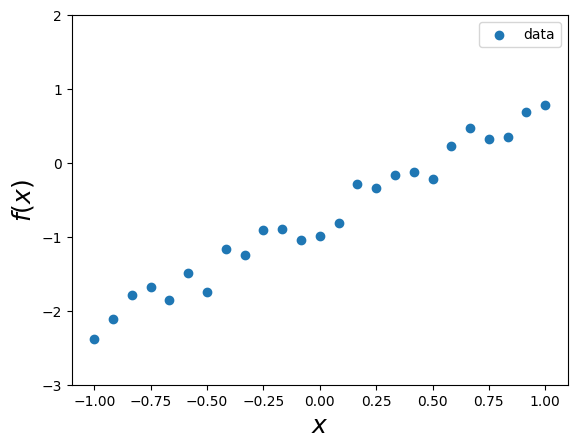

In [57]:
x, y = get_data(25)
plt.scatter(x, y, label='data')
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x)$', fontsize=18)
plt.ylim(-3., 2.)
plt.legend()
# plt.savefig('Figures/data.png')

### **Generating Random Parameters**

Later in the course, we will see how to ''train'' this family of models, but in the mean time let's use some random parameters.
For a one-dimensional model, we only need two parameters, $\mathbf{w} = [w_0,w_1]$, 

$$
[m,b] \sim U([-2,2])
$$
where $U$ is a random distribution between -2 and 2.

In [78]:
# random parameters
def get_random_params():
    theta_random = np.random.uniform(low=-2., high=2., size=(2,1))
    return theta_random

In [79]:
# using the dot_product or the  function, define a function for the linear model
def linear_model(X, w):
    y = matrix_vector_multiplication(X,w)
    return y

parameters
[[ 1.02287355]
 [-0.28902732]]


/var/folders/x7/dwvwf5c92p71ds8swvmz8rlh0000gn/T/ipykernel_88330/1100747337.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[j] = dot_product(ai,v)
/var/folders/x7/dwvwf5c92p71ds8swvmz8rlh0000gn/T/ipykernel_88330/461346486.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(0.1,-2.5,'w0=%.2f, w1=%.2f'%(m,b),fontsize=15)


(-3.0, 2.0)

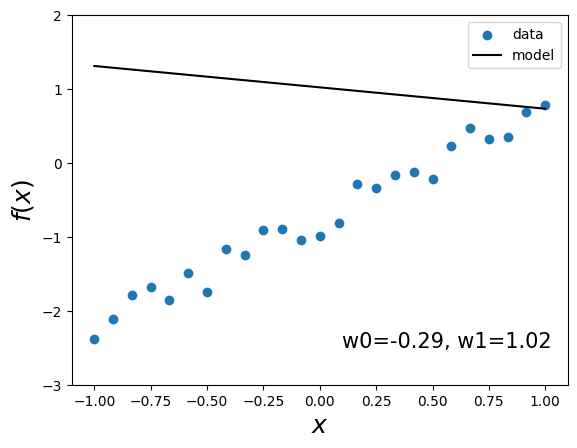

In [85]:
w_rnd = get_random_params()
b,m = w_rnd
print('parameters')
print(w_rnd)

x_grid = np.linspace(-1., 1., 100)
X = np.column_stack((np.ones_like(x_grid),x_grid)) # add a column of ones 

y_pred = linear_model(X,w_rnd) #prediction with random parameters

fig, ax = plt.subplots()
ax.clear()
ax.scatter(x, y,label='data')
ax.plot(x_grid,y_pred,color='k',label='model')
ax.text(0.1,-2.5,'w0=%.2f, w1=%.2f'%(m,b),fontsize=15)
ax.legend(loc=1)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)
ax.set_ylim(-3., 2.)